## 9RC20024T
## Topic: Crypto Investment Fund Directory
#### source of data: https://data.world/dmikebishop/crypto-investment-fund-directory

### introduction 
2018 Directory of Cryptocurrency Investment Funds, The market capitalization of crypto currency has exploded since 2015, reaching over $800  billion  by  January of 2018, and settling at over $200 billion by 3Q 2018 (from less than $20  billion in early 2017).The universe of crypto funds has similarly boomed from a couple dozen in mid 2017 to a few hundred that I have identified through 2Q 2018.
This dataset is a directory of known crypto funds and includes names and contact information.

### abstract
The dataset includes a lot of info, and the important info we may use to analysis is:
1. Country (EX: Canada,United States...)
2. AUM (Millions) (EX: 10,20,30...)
3. Professional Staff (EX: 3,4,5...)
4. Founded (EX: 2015,2016,2017...)
5. Firm Type (EX: Hedge Fund,Venture...)
6. SEC Registered? (YES or NO)
7. Investments (this company invest some other platform or companies)(company names)
8. Position(Founder,Director,CEO...)
9. Form of Incorporation(Corporation,Limited Liability Company...)

### expectation
1. Understand the companies Founded time in a specific country
2. The relationship of AUM and Professional Staff
3. The relationship of high AUM companies and Form of Incorporation
4. The specific Investment company analysis 

### exploratory analysis progress 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('data.csv')
#Take a look at the distribution of the status_type
#AUM (Millions)
print(df['AUM (Millions)'].value_counts())
print()

#represented as percentage
print(df['AUM (Millions)'].value_counts(normalize=True))

#does not include missing data
sum(df['AUM (Millions)'].value_counts())

200            8
10             7
25             6
5              5
50             4
              ..
243.475734     1
220.185912     1
1044.064537    1
1633.497251    1
183.971256     1
Name: AUM (Millions), Length: 78, dtype: int64

200            0.060150
10             0.052632
25             0.045113
5              0.037594
50             0.030075
                 ...   
243.475734     0.007519
220.185912     0.007519
1044.064537    0.007519
1633.497251    0.007519
183.971256     0.007519
Name: AUM (Millions), Length: 78, dtype: float64


133

In [2]:
#SEC Registered?(by position)

def aggfunc(array):
    return array.map({'Yes':1,'No':0}).mean()     #the method map changes 'y' to 1 and 'N' to 0 in the array and then mean is calculated
    
  
temp1 = df.pivot_table(values='SEC Registered?',index=['Position'],aggfunc=aggfunc)
print(temp1)   


                                        SEC Registered?
Position                                               
0                                              0.000000
CEO                                            0.060000
CEO and Chief Investment Officer               1.000000
CEO and Co-Founder                             0.000000
CEO and Founder                                0.000000
CEO and Managing Director                      0.000000
CEO and President                              1.000000
Chairman                                       0.000000
Chief Compliance Officer                       1.000000
Chief Financial Officer                        1.000000
Chief Investment Officer                       0.000000
Chief Operating Officer                        0.000000
Co-Founder                                     0.047619
Co-Founder and CEO                             0.000000
Co-Founder and Chief Operating Officer         1.000000
Co-Founder and President                       0

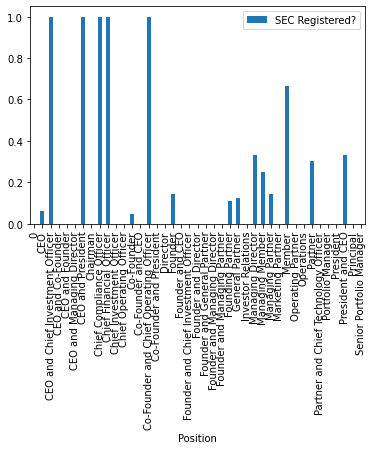

In [3]:
# show bar type
temp1.plot(kind='bar')

### Data munging
- Check missing values in the dataset

In [4]:
#models might not work with missing values 
#the number of missing values in each column 
df.apply(lambda x: sum(x.isnull()),axis=0) 

Firm Name                               0
Address                                 0
Address 2                               1
City                                    0
State/Province                          1
Zip                                     0
Country                                 0
Map                                     0
Code                                    0
Phone                                   0
Fax                                     0
URL                                     0
Contact Title (Mr/Ms.)                  0
Primary Contact                         0
Position                                0
Contact 2                               0
Contact 2 Title                         2
Contact 2 Email                       133
Contact 3                               0
Contact 3 Title                         0
Contact 3 Email                         0
Contact 4                               0
Contact 4 Title                         0
Contact 4 Email                   

- some varibles should not have a missing values: SEC Registered? 
- some useble data(Professional Staff,AUM (Millions),State/Province) have missing values, but we can't fill them since they miss too much(almost half)


In [5]:
#see frequency table
df['SEC Registered?'].value_counts(normalize=True)

No     0.853333
Yes    0.146667
Name: SEC Registered?, dtype: float64

In [6]:
#since 86% is No, it is safe to make the missing values No
df['SEC Registered?'].fillna('No',inplace=True)
df['SEC Registered?'].value_counts(normalize=True)

No     0.854305
Yes    0.145695
Name: SEC Registered?, dtype: float64

- address some weird values

In [7]:

pd.options.mode.chained_assignment = None  # default='warn'
# replace "#REF!" in dataframe
def replace_ref(series):
  for i, j in enumerate(series):
    if j == '#REF!':
      series[i] = np.nan
  return series.astype(float)

df['AUM (Millions)'] = replace_ref(df['AUM (Millions)'])
df['Professional Staff'] = replace_ref(df['Professional Staff'])

df =  df.convert_dtypes()# to let the data available


- Treat for extreme values in distribution

In [8]:
df['AUM (Millions)_log'] = np.log(df['AUM (Millions)'])  #add new series to the dataframe
df['Professional Staff_log'] = np.log(df['Professional Staff'])  #add new series to the dataframe


### visualizing and searching for patterns

In [9]:
%matplotlib inline       
#to see plots in Jupyter notebook         
import matplotlib.pyplot as plt           #import state-machine environment similar to MATLAB

#### Parts of a figure
- figure (whole figure)
- axes (what you think of as 'a plot')
- axis (number-line-like objects)
- artist (everything you can see on the figure)

In [10]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Firm Name                           302 non-null    string 
 1   Address                             302 non-null    string 
 2   Address 2                           301 non-null    string 
 3   City                                302 non-null    string 
 4   State/Province                      301 non-null    string 
 5   Zip                                 302 non-null    string 
 6   Country                             302 non-null    string 
 7   Map                                 302 non-null    string 
 8   Code                                302 non-null    string 
 9   Phone                               302 non-null    string 
 10  Fax                                 302 non-null    string 
 11  URL                                 302 non-n

#### 1. Understand the companies Founded time in a specific country

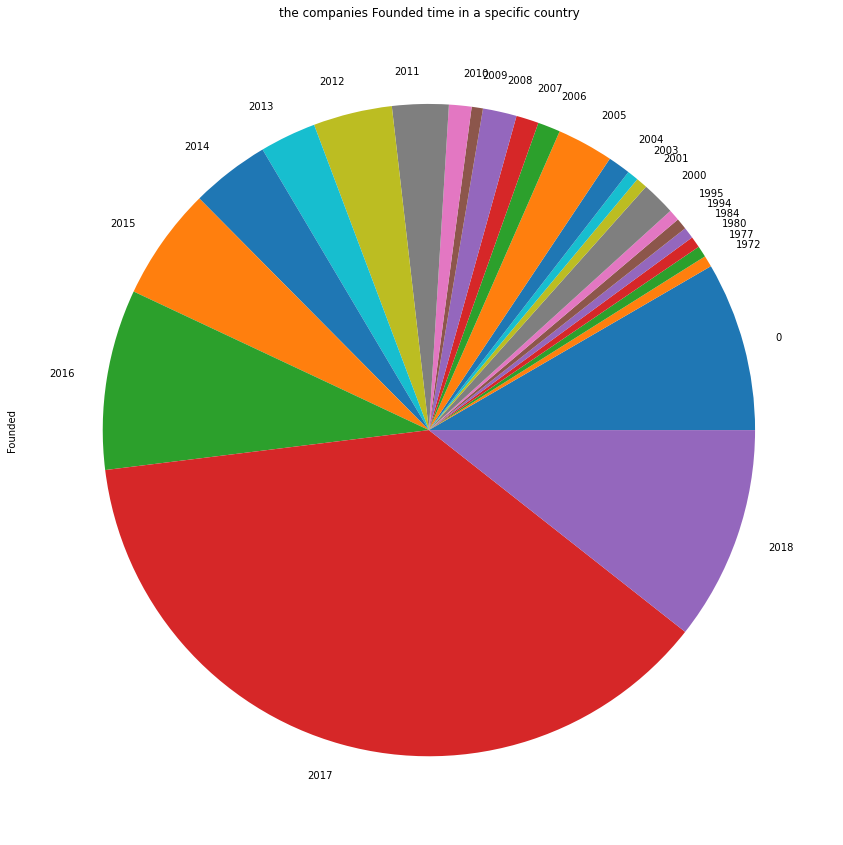

In [11]:
df_US = df[df['Country']=='United States']
# since there are some texts, turn them to numeric
df_US['Founded'] = df_US['Founded'].apply(pd.to_numeric, errors='coerce')

plt.rcParams["figure.figsize"] = (15,15)
df_US['Founded'].groupby(df_US['Founded']).count().plot(kind='pie', title='the companies Founded time in a specific country')


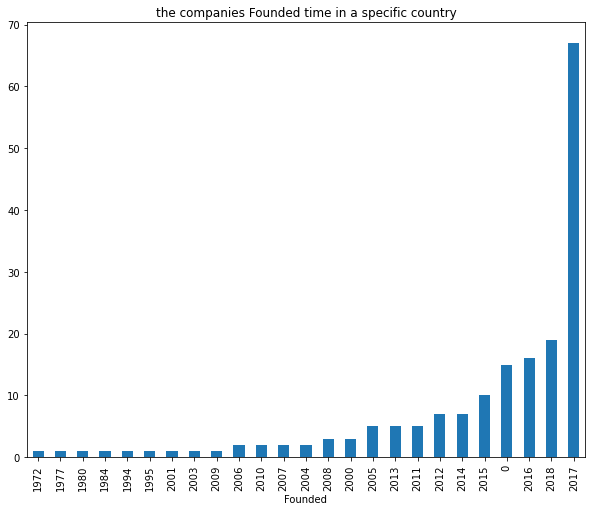

In [12]:
# or use bar chart
plt.rcParams["figure.figsize"] = (10,8)
df_US['Founded'].groupby(df_US['Founded']).count().sort_values().plot(kind='bar', title='the companies Founded time in a specific country')

- in the US, most of the companies in the dataset founded in 2017, and there are still some old companies participate in crypto investment

#### 2. The relationship of AUM and Professional Staff

In [13]:
# use the addressed data
df1 = df[['AUM (Millions)_log','Professional Staff_log']]

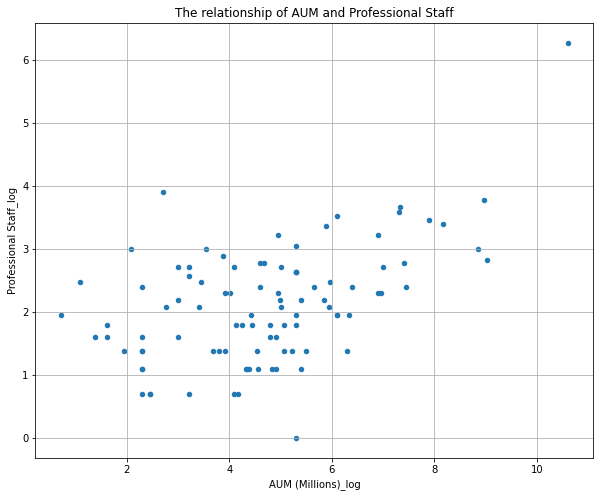

In [14]:
plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams['axes.grid'] = True
df1.plot(kind='scatter', x='AUM (Millions)_log', y='Professional Staff_log', title='The relationship of AUM and Professional Staff', legend=False)

- From the chart, we can see that the relationship of AUM and Professional Staff are roughly proportional

#### 3. The relationship of high AUM companies and Form of Incorporation

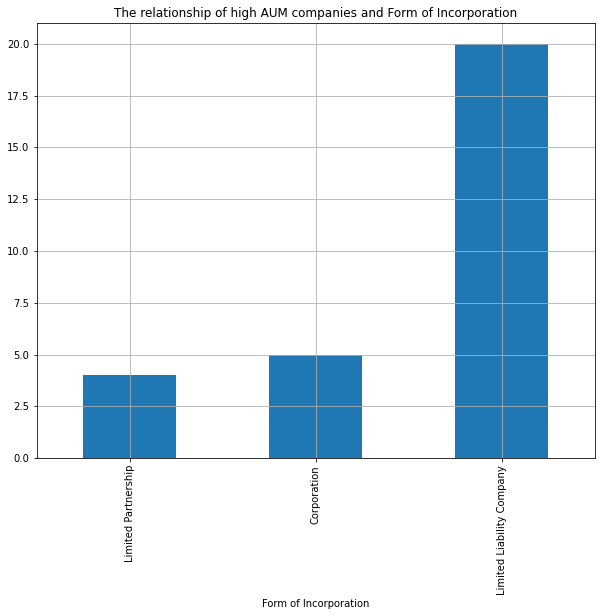

In [15]:
AUM_companies_mean = df['AUM (Millions)_log'].mean() #get mean value
high_AUM_companies = df[(df['AUM (Millions)_log'] > AUM_companies_mean) ]
#we use these 64 data to be high AUM companies

df2 = high_AUM_companies[['AUM (Millions)_log','Form of Incorporation']]

plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams['axes.grid'] = True

df2['Form of Incorporation'].groupby(df2['Form of Incorporation']).count().sort_values().plot(kind='bar',  title='The relationship of high AUM companies and Form of Incorporation', legend=False)

- The high AUM companies are almost Limited Liability Company, and the number of Limited Partnership and Corporation companies are almost same.

#### 4.The specific Investment company analysis

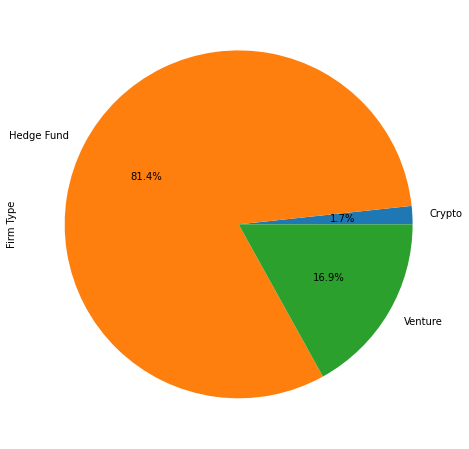

In [16]:
# get the companies which invest ethereum
df_Ethereum = df[(df['Investments 1']=='Ethereum') | (df['Investments 2']=='Ethereum')| (df['Investments 3']=='Ethereum')| (df['Investments 4']=='Ethereum')| (df['Investments 5']=='Ethereum')]
# analysis firm type
plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams['axes.grid'] = True

# pie chart
df_Ethereum['Firm Type'].groupby(df['Firm Type']).count().plot(kind='pie', autopct='%0.1f%%')

- For the companies which invest ethereum, almost all of them are Firm Type

#### Building a Predictive Model -- Decision Tree

In [17]:
#Import models from scikit learn module:
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

#change categorical variables into numeric
from sklearn.preprocessing import LabelEncoder
var_mod = ['AUM (Millions)_log','Professional Staff_log','Founded']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

# only use the data which is int to be outcomes and predictors
outcomes = ['AUM (Millions)_log','Professional Staff_log','Founded']
for outcome in outcomes:
    print("outcome:",outcome)
    model = DecisionTreeClassifier()
    predictors = ['AUM (Millions)_log','Professional Staff_log','Founded']

    model.fit(df[predictors],df[outcome])
    #Make predictions on training set:(Predict class or regression value)
    predictions = model.predict(df[predictors])

    #Print accuracy
    #所有准确的条目有多少被检索出来了
    accuracy = metrics.accuracy_score(predictions,df[outcome])
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

    #Perform k-fold cross-validation with 5 folds
    #将训练/测试数据集划分n_splits个互斥子集，每次用其中一个子集当作验证集，
    #剩下的n_splits-1个作为训练集，进行n_splits次训练和测试，得到n_splits个结果
    kf = KFold(n_splits=5)
    error = []

    for train, test in kf.split(df):
        # Filter training data
        train_predictors = (df[predictors].iloc[train,:])

        # The target we're using to train the algorithm.
        train_target = df[outcome].iloc[train]

        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)

        #Record error from each cross-validation run
        error.append(model.score(df[predictors].iloc[test,:], df[outcome].iloc[test]))

    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))


outcome: AUM (Millions)_log
Accuracy : 100.000%
Cross-Validation Score : 16.213%
outcome: Professional Staff_log
Accuracy : 100.000%
Cross-Validation Score : 52.617%
outcome: Founded
Accuracy : 100.000%
Cross-Validation Score : 93.355%


- from the result , we can know that use Founded as outcome can be most correct